## Q4. (Digital Image Creation - Rectangles)

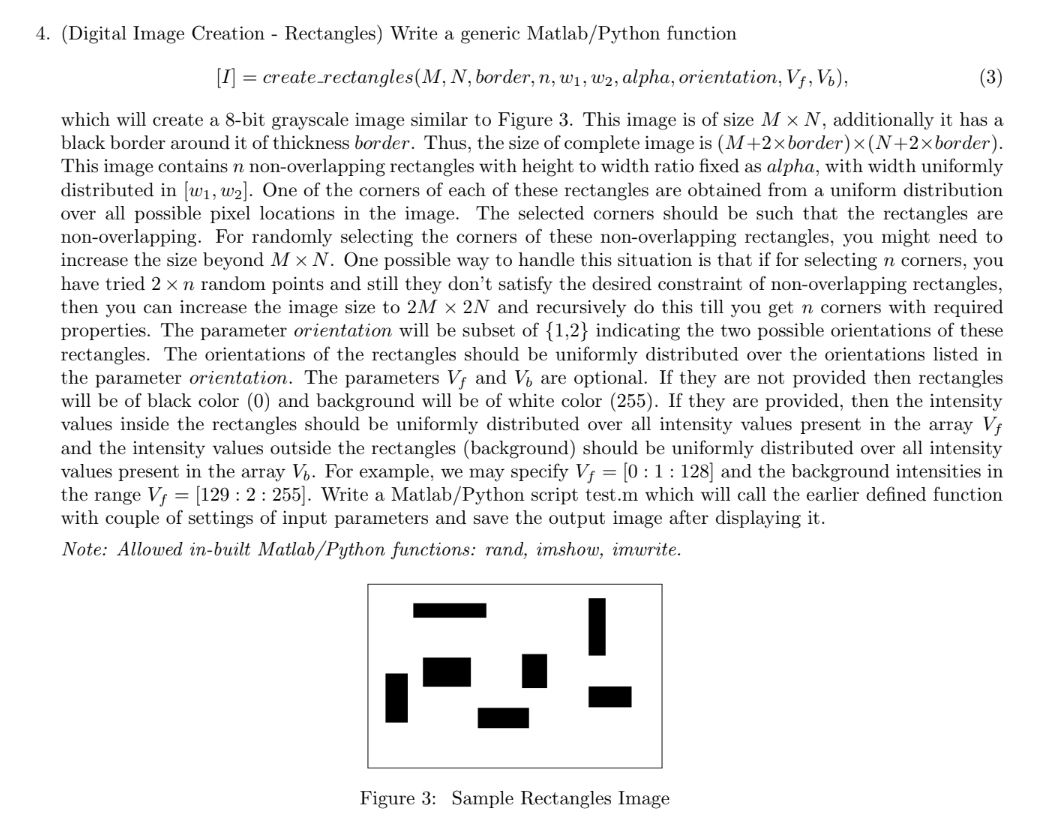

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# SEED THE RANDOM NUMBER GENERATOR
np.random.seed(0)

def create_rectangles(M, N, border, n, w1, w2, alpha, orientation, Vf = None, Vb = None):
    
    # Check if the arguments are valid
    if M <= 0 or N <= 0 or border < 0 or n <= 0 or w1 <= 0 or w2 <= 0 or w1 > w2:
        print("Invalid Arguments: M, N, border, n, w1, w2 must be positive and w1 <= w2")
        sys.exit(1)
    
    if w1 > M or w1 > N or w2 > M or w2 > N:
        print("Invalid Arguments: w1 or w2 is greater than M or N")
        sys.exit(1)
        
    if 1 not in orientation and 2 not in orientation:
        print("Invalid Arguments: orientation must be a subset of {1, 2}")
        sys.exit(1)
    
    # create a blank image
    img = np.zeros((M + 2*border, N + 2*border), dtype=np.uint8)

    # fill the image with background color
    for i in range(M + 2*border):
        for j in range(N + 2*border):

            if Vb is None:
                img[i, j] = 255
            else:
                img[i, j] = np.random.choice(Vb)

            # Fill Border with Black
            if i < border or i >= M + border or j < border or j >= N + border:
                img[i, j] = 0
    
    
    # We will store the top left corner of the rectangles in this list along with their orientation, width and height
    rectangles = []
    
    tries = 0
    
    while len(rectangles) < n:
        
        # Generate a random point : Lower left corner of the rectangle
        # The lower limit for X and Y is border because we don't want the rectangle to go out of the image
        # The upper limit will depend on the orientation of the rectangle, if it is vertical then the upper limit for X will be M + border - height, if it is horizontal then the upper limit for Y will be N + border - width
        
        tries += 1
        
        if tries > 2*n:
            print("Tried 2*n points and failed. Trying again with double the size of the image: M = ", 2*M, " N = ", 2*N)
            # Recursively call the function with double the size of the image
            return create_rectangles(2*M, 2*N, border, n, w1, w2, alpha, orientation, Vf, Vb)
        
        lower_limit = border
        upper_limit_x = None
        upper_limit_y = None
        
        if 1 in orientation and 2 in orientation:
            # Rectangle can be vertical or horizontal
            upper_limit_x = M + border - max(w1, alpha*w1)
            upper_limit_y = N + border - max(w1, alpha*w1)
        
        elif 1 in orientation:
            # Rectangle can be vertical
            upper_limit_x = M + border - alpha*w1
            upper_limit_y = N + border - w1
        
        elif 2 in orientation:
            # Rectangle can be horizontal
            upper_limit_x = M + border - w1
            upper_limit_y = N + border - alpha*w1
        
        # Upper Limit is Exclusive
        x = np.random.randint(lower_limit, upper_limit_x)
        y = np.random.randint(lower_limit, upper_limit_y)
        
        # Generate a random orientation
        o = np.random.choice(orientation)
        
        # Generate a random width
        width = np.inf
        height = np.inf
        
        # Make sure it does not lead to an invalid rectangle which crosses the border
        while x + height >= M + border or y + width >= N + border:
            
            # Generate New Width
            width = np.random.randint(w1, w2+1)

            # Generate the height based on width, alpha and orientation
            if o == 1:
                # Vertical
                height = alpha*width
            
            elif o == 2:
                # Horizontal
                height = width*alpha
                # Swap width and height
                width, height = height, width


        # Check if the rectangle is overlapping with any of the previously generated rectangles
        overlapping = False
        
        for rect in rectangles:
            if x + height > rect[0] and x < rect[0] + rect[3] and y + width > rect[1] and y < rect[1] + rect[2]:
                overlapping = True
                break
        
        if overlapping:
            continue
    
        # If the rectangle is not overlapping then add it to the list
        rectangles.append([x, y, width, height, orientation])
        
    # Fill the rectangles with the foreground color
    for rect in rectangles:
        if Vf is None:
            img[rect[0]:rect[0]+rect[3], rect[1]:rect[1]+rect[2]] = 0
        else:
            for i in range(rect[0], rect[0]+rect[3]):
                for j in range(rect[1], rect[1]+rect[2]):
                    img[i, j] = np.random.choice(Vf)
    
    
    return img

In [2]:
# create a 8-bit grayscale image similar to Figure 3
img = create_rectangles(
    M=256,
    N=256,
    border=20,
    n=7,
    w1=40,
    w2=80,
    alpha=2,
    orientation=[1, 2],
    Vf=range(0, 129, 1),
    Vb=range(129, 256, 2)
)

Tried 2*n points and failed. Trying again with double the size of the image: M =  512  N =  512
Tried 2*n points and failed. Trying again with double the size of the image: M =  1024  N =  1024


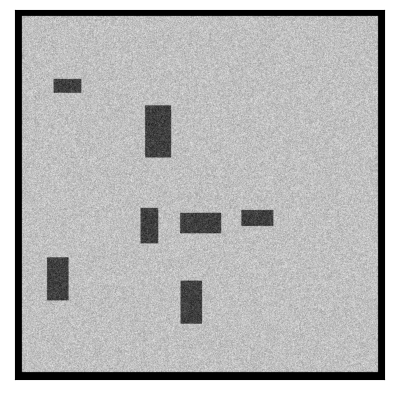

In [3]:
# Display the image
plt.imshow(img, cmap='gray')

# X and Y ticks false
plt.xticks([])
plt.yticks([])

# Save the image
plt.imsave('Q4.png', img, cmap='gray')